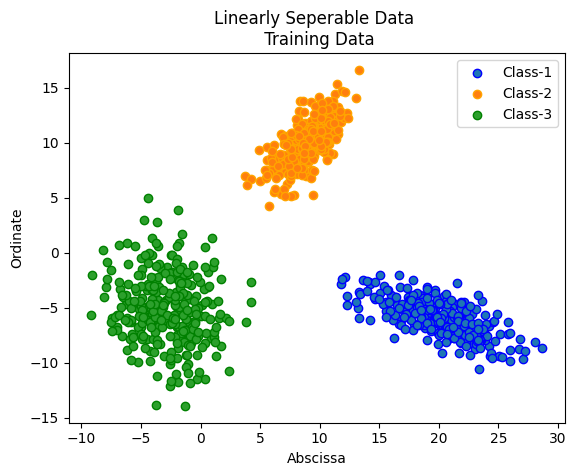

[[ 19.115   -6.1081]
 [ 17.82    -5.4537]
 [ 17.527   -5.7497]
 ...
 [ -2.4594 -11.622 ]
 [ -1.7172  -1.505 ]
 [ -1.1127  -1.7282]]


In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Load the data from the text file
data1 = np.loadtxt(r'C:\Users\Asus\Documents\Python Codes\Assignments\Deep Learning\Data\Classification\LS_Group12\Class1.txt')
data2 = np.loadtxt(r'C:\Users\Asus\Documents\Python Codes\Assignments\Deep Learning\Data\Classification\LS_Group12\Class2.txt')
data3 = np.loadtxt(r'C:\Users\Asus\Documents\Python Codes\Assignments\Deep Learning\Data\Classification\LS_Group12\Class3.txt')

# Split the data into training,Validation & testing sets
np.random.seed(42)
np.random.shuffle(data1)
np.random.shuffle(data2)
np.random.shuffle(data3)

train = np.concatenate([data1[:300],data2[:300],data3[:300]])
test = np.concatenate([data1[300:],data2[300:],data3[300:]])


train1 = data1[:300]
train2 = data2[:300]
train3 = data3[:300]

test1 = data1[300:400]
test2 = data2[300:400]
test3 = data3[300:400]

validation1 = data1[400:500]
validation2 = data2[400:500]
validation3 = data3[400:500]

plt.scatter(train1[:, 0], train1[:, 1],label='Class-1',edgecolors="blue",cmap="set1")
plt.scatter(train2[:, 0], train2[:, 1],label='Class-2',edgecolors="orange",cmap="set1")
plt.scatter(train3[:, 0], train3[:, 1],label='Class-3',edgecolors="green",cmap="set1")
plt.xlabel("Abscissa")
plt.ylabel("Ordinate")
plt.title("Linearly Seperable Data \n Training Data")
plt.legend()
plt.show()
print(train)

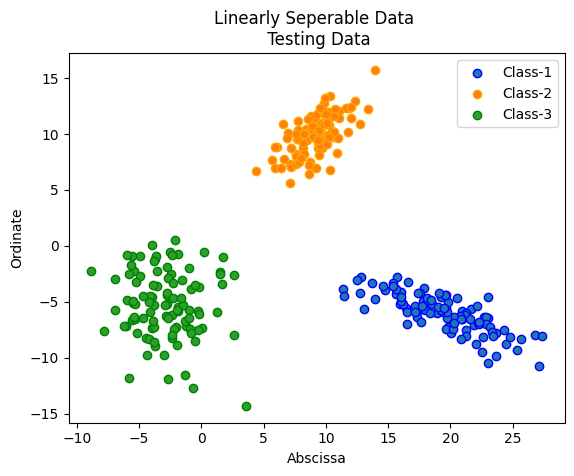

In [4]:
# fig,axis=plt.subplots(1,3)
plt.scatter(test1[:, 0], test1[:, 1],label='Class-1',edgecolors="blue")
plt.scatter(test2[:, 0], test2[:, 1],label='Class-2',edgecolors="orange")
plt.scatter(test3[:, 0], test3[:, 1],label='Class-3',edgecolors="green")
plt.xlabel("Abscissa")
plt.ylabel("Ordinate")
plt.title("Linearly Seperable Data \n Testing Data")
plt.legend()
plt.show()

In [5]:
def Leaky_Relu(x):
    if x>=0:
        return x
    else:
        return 0.01*x

def Relu(x):
    return max(0,x)

def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Update_Weight(Weight,N_In,N_Out,Yn):
    Learning_Rate=0.03
    Delta_W = Learning_Rate*np.outer(N_In,N_Out*(1-N_Out)*(Yn-N_Out))
    # Weight=np.add(Weight,Delta_W,out=Weight, casting='unsafe')
    Weight=Weight+Delta_W
    return Weight


#Assuming 1 hidden layers,Generalize it afterwards
def Perceptron(Data,Epoch):
         
    # W_o=np.array([[1,1,1],[1,1,1],[1,1,1],[1,1,1],[1,1,1]])    # 3 Neurons in Output Layer
    # W_h=np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])        # 5 Neurons in Hidden Layer
    
    W_o=np.random.randn(5,3)
    W_h=np.random.randn(3,5)
    Errors=np.array([])
    Avg_Errors=np.array([])
    GT=[]
    while(Epoch):
        H1=[]
        Y=[]
        for i in range(len(Data)):
            
            # In_H1=np.concatenate([1],Data[i,:], axis=0) #Inputs to Input Layer
            In_H1=[1,Data[i,0],Data[i,1]] #Inputs to Input Layer
            Out_H1=Sigmoid(np.dot(In_H1,W_h)) #Hidden Layer Output
            H1.append(Out_H1)
            Y_pred=Sigmoid(np.dot(Out_H1,W_o)) #Output of FCNN
            Y.append(Y_pred)
            Class1,Class2,Class3 = 0,0,0
            
            if i<300:
                Class1=1      # Belongs to Class-1
            elif i>=300 and i<600:
                Class2=1      # Belongs to Class-2
            else:
                Class3=1      # Belongs to Class-3

            Y_GT=[Class1,Class2,Class3]
            GT.append(Y_GT)
            Error=sum(0.5*(Y_GT-Y_pred)**2)
            Errors=np.append(Errors,Error)
            #Weight Updation
            W_o=Update_Weight(W_o,Out_H1,Y_pred,Y_GT)
            # W_h=Update_Weight(W_h,In_H1,Y_pred,Y_GT)
            A=(np.dot(W_o,(Y_GT-Y_pred)*Y_pred*(1-Y_pred)))
            B=Out_H1*(1-Out_H1)
            W_h =np.add(W_h,0.03*np.outer(In_H1,A*B), out=W_h, casting='unsafe') 
        Epoch-=1
        Avg_Error=np.mean(Errors)
        Avg_Errors=np.append(Avg_Errors,Avg_Error)

    return W_o,W_h,Avg_Errors,GT,Y,H1

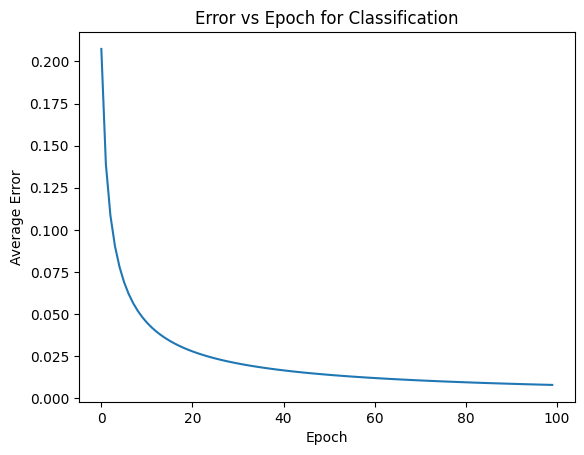

In [6]:
W_o,W_h,Avg_Errors,GT,Y,H1 = Perceptron(train,100)

plt.plot(Avg_Errors)
plt.title("Error vs Epoch for Classification")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.show()


In [7]:
# print(np.concatenate(H1))
# H1=np.concatenate(H1)
H1=np.array(H1)
print(len(H1[:,0]))

900


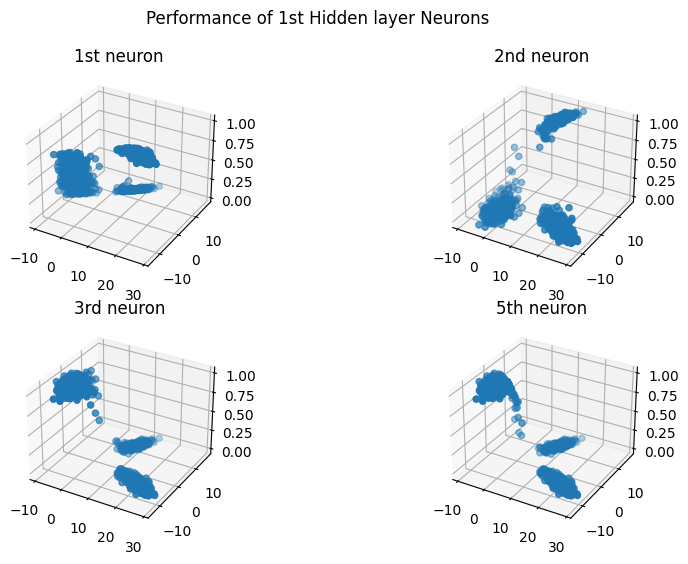

In [11]:

plt.figure(figsize=(10, 6))
plt.suptitle("Performance of 1st Hidden layer Neurons")

ax = plt.subplot(2, 2, 1, projection='3d')
ax.scatter(train[:,0], train[:,1],H1[:,0])
ax.set_title('1st neuron')

ax = plt.subplot(2, 2, 2,projection='3d')
ax.scatter(train[:,0], train[:,1],H1[:,1])
ax.set_title('2nd neuron')


ax = plt.subplot(2, 2, 3,projection='3d')
ax.scatter(train[:,0], train[:,1],H1[:,2])
ax.set_title('3rd neuron')

ax = plt.subplot(2, 2, 4,projection='3d')
ax.scatter(train[:,0], train[:,1],H1[:,4])
ax.set_title('5th neuron')



plt.show()

In [9]:
def FCNN_Test(Data,W_h,W_o):
    Predictions=[]
    for i in range(len(Data)):
        Out_H1=Sigmoid(np.dot([1,Data[i,0],Data[i,1]],W_h)) # Ouput of 1st Hidden Layer
        Out_FCNN=Sigmoid(np.dot(Out_H1,W_o))                # Output of FCNN
        Predictions.append(Out_FCNN)
    return Predictions

Predictions=FCNN_Test(test,W_h,W_o)
# print(Predictions)
# from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,f1_score

# CM = confusion_matrix(GT[:600],Predictions)
# Accuracy= accuracy_score(GT,Predictions)
# print("Confusion Matrix \n",CM)
# print(f'\nAccuracy : {Accuracy*100}%')

# print(len(FCNN_Test(test,W_h,W_o)))
# FCNN_Test(test,W_h,W_o).shape

In [10]:
def classifier(Data,W_h,W_o):
    Out_H1=Sigmoid(np.dot([1,Data[0],Data[1]],W_h)) # Ouput of 1st Hidden Layer
    Out_FCNN=Sigmoid(np.dot(Out_H1,W_o))            # Output of FCNN
    return np.argmax(np.array(Out_FCNN))

x_arr = np.linspace(-10, 29, 1000)
y_arr = np.linspace(-15, 17, 1000)
xx, yy = np.meshgrid(x_arr, y_arr)
region = np.concatenate((xx.reshape((-1,1)), yy.reshape((-1,1))), axis=1)
# print(region.shape)

Class_Predictions = []
for point in region:
    Class_Predictions.append(classifier(point,W_h,W_o))

Class_Predictions = np.reshape(Class_Predictions, xx.shape)
plt.figure()
plt.contourf(xx, yy, Class_Predictions, alpha = 0.5)
plt.scatter(train1[:, 0],train1[:, 1], label='Class 1', edgecolors='black')
plt.scatter(train2[:, 0],train2[:, 1], label='Class 2', edgecolors='black')
plt.scatter(train3[:, 0],train3[:, 1], label='Class 3', edgecolors='black')
plt.xlabel("Abscissa")
plt.ylabel("Ordinate")
plt.title("Class-1 vs Class-2 vs Class-3")
plt.legend()
plt.show()

KeyboardInterrupt: 